# Problem Statement:
Car Data- Here, we will apply k-means clustering for grouping the similar cars in one cluster

# Q1. Load the Cars Data and necesary modules file into Python DataFrame and view top 10 rows

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from pandas.plotting import scatter_matrix

In [2]:
data = pd.read_csv('cars-+K+men.csv')

In [3]:
data.head(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


# Q2.  Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
data.dtypes

mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
car_name     object
dtype: object

In [6]:
data.shape

(398, 9)

In [7]:
data.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


# Q3. Check for missing value check, incorrect data and perform imputation with mean, median and mode as necessary

In [8]:
data.isnull().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_name    0
dtype: int64

In [9]:
data[data['hp']=="?"]

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [10]:
data['hp'].replace("?",np.nan, inplace=True)

In [11]:
hp = data['hp'].dropna()
hp.count()

392

In [12]:
data['hp'].fillna((data['hp'].median()), inplace=True)
data['hp'] = data['hp'].astype('float')

In [13]:
data.dtypes

mpg         float64
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
origin        int64
car_name     object
dtype: object

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences

In [14]:
data.corr(method='kendall')

,mpg,cyl,disp,hp,wt,acc,yr,origin
mpg,1.000000,-0.686477,-0.679847,-0.673377,-0.694006,0.301096,0.413661,0.467249
cyl,-0.686477,1.000000,0.794854,0.682006,0.735481,-0.367194,-0.273742,-0.551610
disp,-0.679847,0.794854,1.000000,0.711556,0.800508,-0.352110,-0.218920,-0.570074
hp,-0.673377,0.682006,0.711556,1.000000,0.696368,-0.482267,-0.274888,-0.402494
wt,-0.694006,0.735481,0.800508,0.696368,1.000000,-0.268619,-0.196863,-0.496185
acc,0.301096,-0.367194,-0.352110,-0.482267,-0.268619,1.000000,0.196024,0.173055
yr,0.413661,-0.273742,-0.218920,-0.274888,-0.196863,0.196024,1.000000,0.136967
origin,0.467249,-0.551610,-0.570074,-0.402494,-0.496185,0.173055,0.136967,1.000000


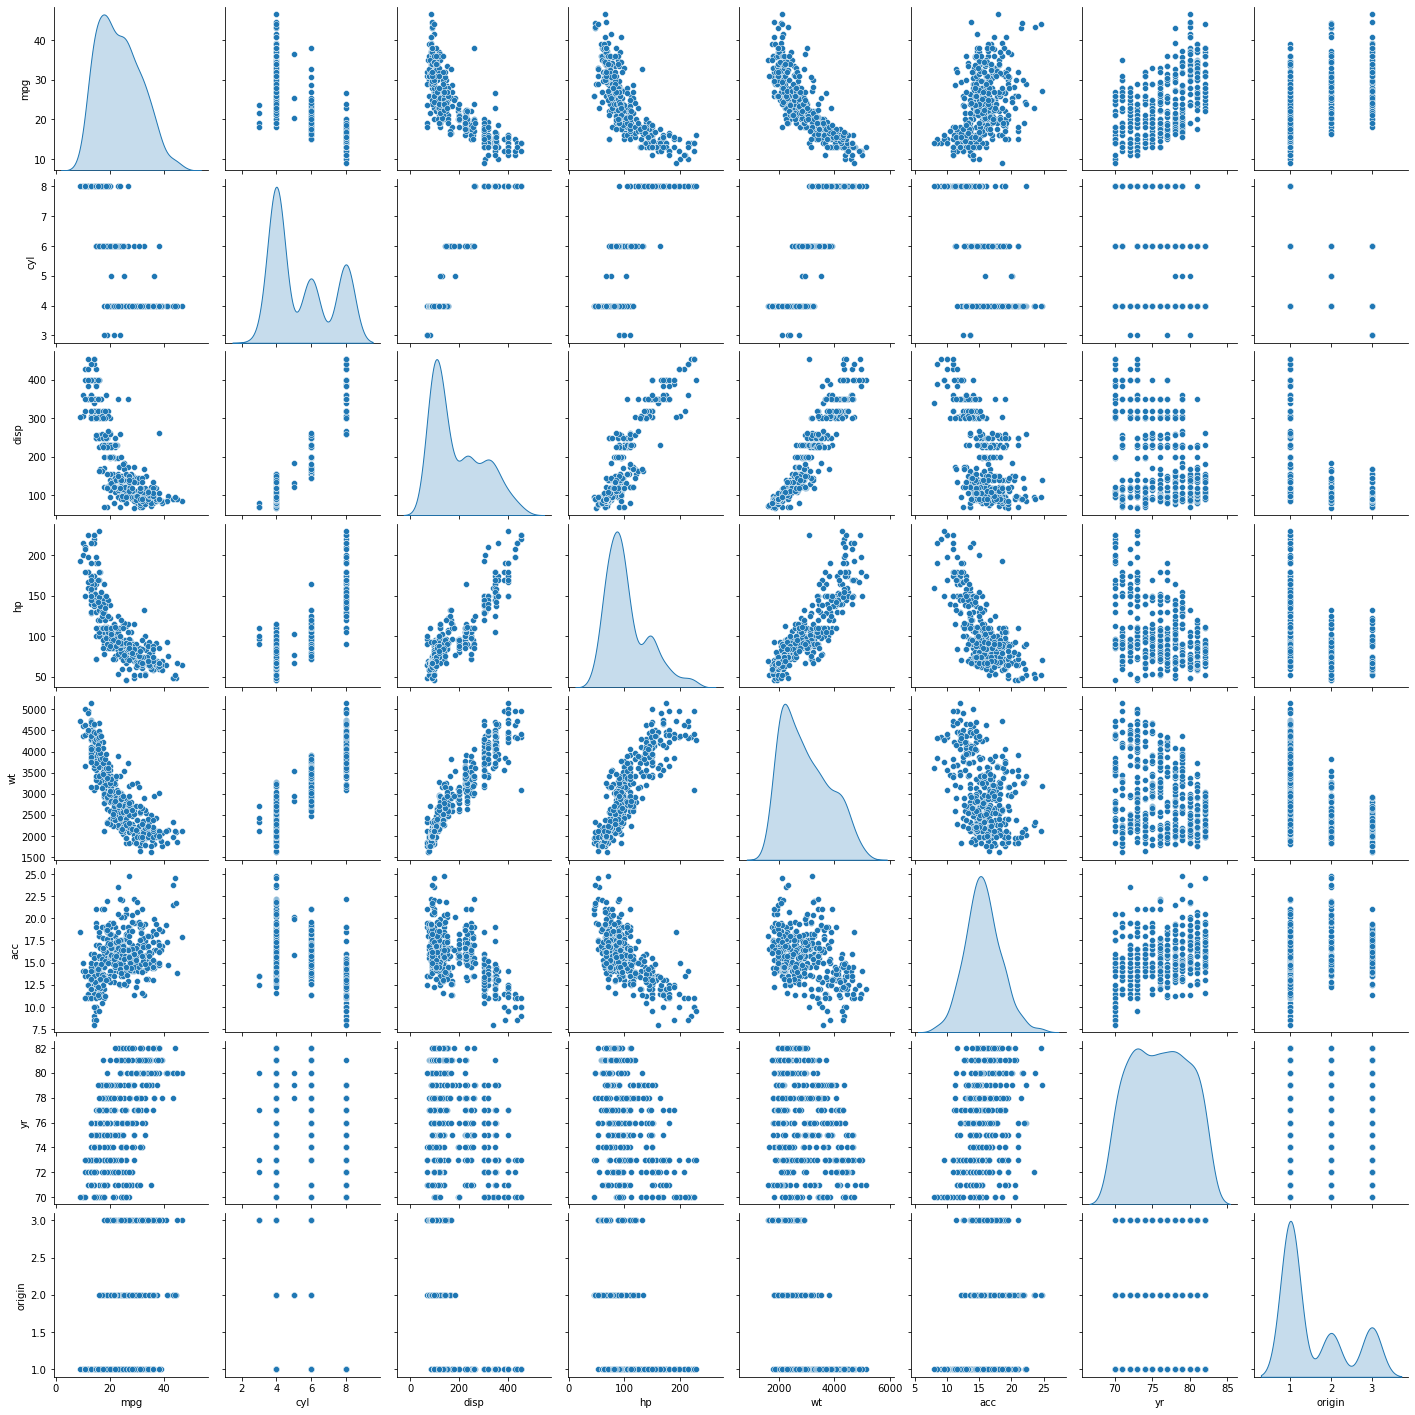

In [15]:
sns.pairplot(data,diag_kind='kde')

### Observations
### From diagonal plots we can see origin has 3 points (evident from data)
### yr - shows two peaks majorily
### acc,mpg are nearly normal
### cyl and disp shows 3 clusters while wt shows 2
### from bivariate plots we can see that mps shows negative liner relationship with wt,hp and disp 
### (correlation too gives high negative correlation)
### Cyl too shows negative correlation with levels

# Q5. Perform any feature engineering/transformation and remove any duplicate or irrelevant columns

In [16]:
data['age'] = 83-data['yr']
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name,age
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,13
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,13
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,13
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,13
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,13


In [18]:
one_hot = pd.get_dummies(data['origin'])
one_hot = one_hot.add_prefix('origin_')

data = data.join(one_hot)
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name,age,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,13,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,13,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,13,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,13,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,13,1,0,0


In [19]:
data = data.drop(['yr','origin','car_name'], axis =1)
data.head()

,mpg,cyl,disp,hp,wt,acc,age,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,13,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,13,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,13,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,13,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,13,1,0,0


# Q6. Create new data frame with standardize variables and imputation for any missing/outliers

<AxesSubplot:>

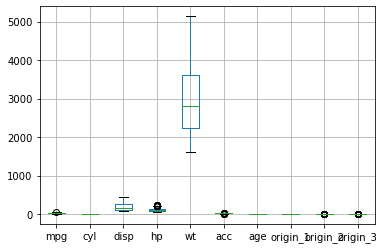

In [20]:
data.boxplot()

{'whiskers': [<matplotlib.lines.Line2D at 0x23f0da318b0>,
 'caps': [<matplotlib.lines.Line2D at 0x23f0da31e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x23f0da31700>],
 'medians': [<matplotlib.lines.Line2D at 0x23f0da3d430>],
 'fliers': [<matplotlib.lines.Line2D at 0x23f0da3d700>],
 'means': []}

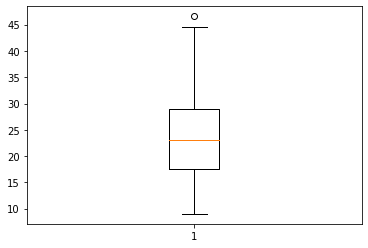

In [23]:
plt.boxplot(data['mpg'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23f0da9b4f0>,
 'caps': [<matplotlib.lines.Line2D at 0x23f0da9ba90>,
 'boxes': [<matplotlib.lines.Line2D at 0x23f0da8e070>],
 'medians': [<matplotlib.lines.Line2D at 0x23f0daa8070>],
 'fliers': [<matplotlib.lines.Line2D at 0x23f0daa8340>],
 'means': []}

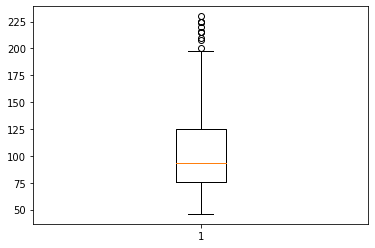

In [24]:
plt.boxplot(data['hp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23f0ead2280>,
 'caps': [<matplotlib.lines.Line2D at 0x23f0ead2820>,
 'boxes': [<matplotlib.lines.Line2D at 0x23f0dae9df0>],
 'medians': [<matplotlib.lines.Line2D at 0x23f0ead2dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23f0eae00d0>],
 'means': []}

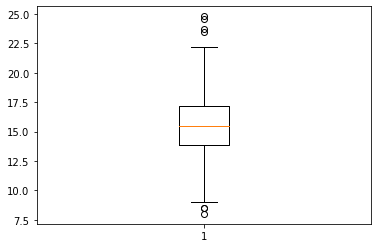

In [25]:
plt.boxplot(data['acc'])

In [26]:
# Take logaritmic transform for hp,mpg and acc to remove outliers
data['hp'] = np.log(data['hp'])
data['acc'] = np.log(data['acc'])
data['mpg'] = np.log(data['mpg'])

data.head()

,mpg,cyl,disp,hp,wt,acc,age,origin_1,origin_2,origin_3
0,2.890372,8,307.0,4.867534,3504,2.484907,13,1,0,0
1,2.708050,8,350.0,5.105945,3693,2.442347,13,1,0,0
2,2.890372,8,318.0,5.010635,3436,2.397895,13,1,0,0
3,2.772589,8,304.0,5.010635,3433,2.484907,13,1,0,0
4,2.833213,8,302.0,4.941642,3449,2.351375,13,1,0,0


<AxesSubplot:>

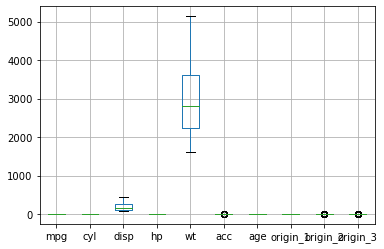

In [27]:
data.boxplot()

In [28]:
from scipy.stats import zscore

In [29]:
data.dtypes

mpg         float64
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
age           int64
origin_1      uint8
origin_2      uint8
origin_3      uint8
dtype: object

In [30]:
numeric_cols = data.select_dtypes(include=[np.int64, np.float64]).columns
numeric_cols

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'age'], dtype='object')

In [31]:
data[numeric_cols] = data[numeric_cols].apply(zscore)

In [32]:
data.head()

,mpg,cyl,disp,hp,wt,acc,age,origin_1,origin_2,origin_3
0,-0.622035,1.498191,1.090604,0.823608,0.630870,-1.353748,1.627426,1,0,0
1,-1.159493,1.498191,1.503514,1.523992,0.854333,-1.589535,1.627426,1,0,0
2,-0.622035,1.498191,1.196232,1.243998,0.550470,-1.835805,1.627426,1,0,0
3,-0.969242,1.498191,1.061796,1.243998,0.546923,-1.353748,1.627426,1,0,0
4,-0.790530,1.498191,1.042591,1.041316,0.565841,-2.093533,1.627426,1,0,0


# Q7. Create appropriate clusters with the new data set

In [35]:
from sklearn.cluster import KMeans
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(data)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,3000.226131
1,2,1435.661694
2,3,1072.434353
3,4,873.696202
4,5,786.879794
5,6,718.584525
6,7,671.321799
7,8,632.244373
8,9,597.989572
9,10,555.342573


# Q8. Identify the appropriate clusters with result from above question

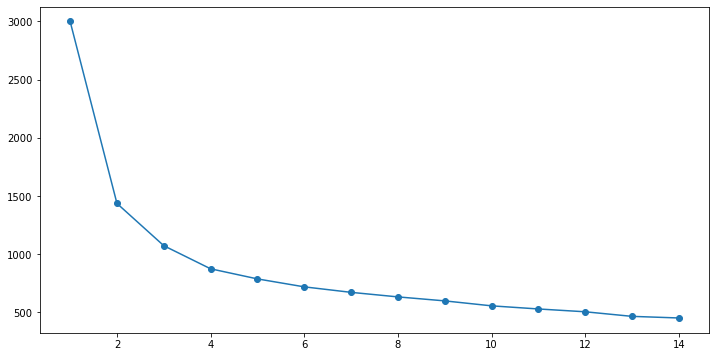

In [36]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [37]:
kmeans = KMeans(n_clusters=4, n_init = 5, random_state=12345)
kmeans.fit(data)

KMeans(n_clusters=4, n_init=5, random_state=12345)

# Q9. Check for no of values in each cluster and centers for each variables

In [38]:
labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[ 94 117  96  91]


In [40]:
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(data) )
centroid_df.transpose()

,0,1,2,3
mpg,-1.306300e+00,1.080530,0.337373,-0.395798
cyl,1.498191e+00,-0.821104,-0.868584,0.424430
disp,1.503923e+00,-0.773034,-0.824059,0.309735
hp,1.442656e+00,-0.799132,-0.545073,0.112262
wt,1.404098e+00,-0.748370,-0.770282,0.324409
acc,-1.150226e+00,0.426220,0.308195,0.315020
age,6.883238e-01,-1.087358,0.657116,-0.006206
origin_1,1.000000e+00,0.410256,0.250000,0.912088
origin_2,-2.498002e-16,0.188034,0.468750,0.032967
origin_3,8.326673e-17,0.401709,0.281250,0.054945


# Q10. Assign the groups created above to data frame and study the characteristics for each group.

In [42]:
predictions = kmeans.predict(data)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 3, 0, 0, 0, 0, 2, 2, 2, 2, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0,
       0, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 2, 0, 0, 0, 0, 3, 2, 2,
       2, 2, 2, 3, 2, 0, 0, 2, 2, 2, 2, 0, 2, 3, 0, 3, 3, 3, 3, 2, 2, 2,
       2, 3, 3, 3, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 2, 2, 3, 2, 2, 2, 2, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 3, 3, 3, 3, 1, 2, 2,
       1, 3, 3, 3, 3, 2, 1, 2, 2, 2, 0, 2, 3, 3, 0, 0, 0, 0, 1, 1, 1, 2,
       1, 0, 3, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 2, 2, 1, 2, 1, 1, 1, 2, 3,
       2, 2, 1, 1, 1, 1, 1, 3, 0, 0, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 0, 3,
       0, 0, 1, 1, 1, 1, 2, 3, 1, 1, 2, 3, 2, 3, 1, 1, 3, 3, 1, 3, 3, 3,
       0, 0, 3, 0, 0, 3, 0, 1, 1, 1, 1, 1, 3, 1, 3,

In [46]:
data['group'] = predictions
data['group'] = data['group'].astype('category')
data.dtypes

mpg          float64
cyl          float64
disp         float64
hp           float64
wt           float64
acc          float64
age          float64
origin_1       uint8
origin_2       uint8
origin_3       uint8
group       category
dtype: object

array([[<AxesSubplot:title={'center':'acc'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'age'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[group]'>],
       [<AxesSubplot:title={'center':'hp'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'mpg'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'origin_1'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'origin_2'}, xlabel='[group]'>],
       [<AxesSubplot:title={'center':'origin_3'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[group]'>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

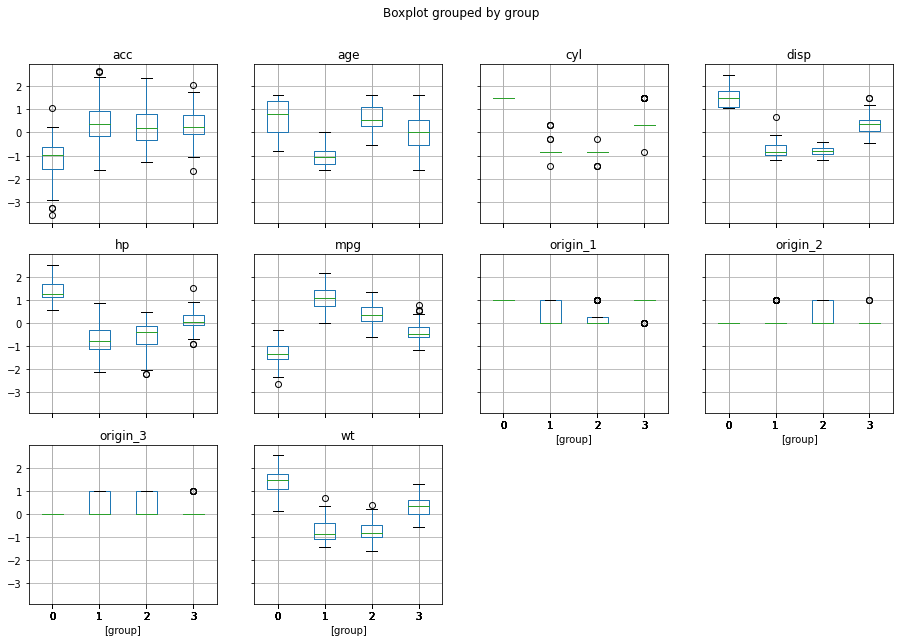

In [47]:
data['group'] = predictions
data.boxplot(by = 'group',  layout=(3,4), figsize=(15, 10))

#### Group 0 is characterised by lower acc, comparitely old models, higher wt, hp but lowest mpg with origin at 1
#### Group 1 -Highest mpg, lower wt and hp. Lower age limits suggest comparitevly newer cars. Origin looks more 2
#### Group 2 - Origin mostly in location 2, lower deviation in wts, and hp so medain mpg and acceleration
#### Group 3 - Again slighlty higher in wt origin code as 1. Better performance in terms of mpg